In [1]:
import numpy as np
import VAMPClass
import AnalyticalMappingEntropyClass
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
reload(VAMPClass)
reload(AnalyticalMappingEntropyClass)

<module 'AnalyticalMappingEntropyClass' from '/import/a12/users/clarkt/mapping-entropy/cg-mapping/methods/AnalyticalMappingEntropyClass.py'>

In [2]:
kirchoff_matrix = [[ 1, -1,  0, 0],
                   [-1, 11,-10, 0],
                   [ 0,-10, 11,-1],
                   [ 0,  0,- 1, 1]]

In [3]:
vamp = VAMPClass.VAMP(kirchoff_matrix,n_beads=2)
vamp.compute_vamp(100)
vamp_results,lagtime = vamp.return_vamp_scores()

In [4]:
ame = AnalyticalMappingEntropyClass.AME(kirchoff_matrix)
ame.compute_ame()
ame_results = ame.return_ame_scores()
vp_results = ame.return_vp_scores()

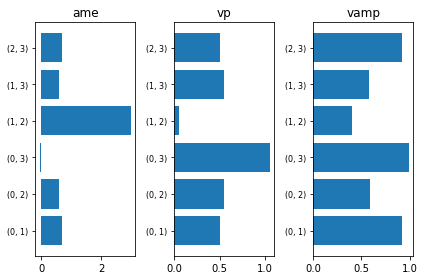

In [5]:
results = [ame_results,vp_results,vamp_results]
titles = ['ame','vp','vamp']
fig,ax = plt.subplots(nrows=1,ncols=len(titles),tight_layout=True)

for ia,aa in enumerate(ax):
    keys = list(results[ia].keys())
    values = results[ia].values()
    y = np.arange(len(values))
    aa.barh(y,values)
    aa.set_yticks(y, keys,fontsize=8,rotation=0)
    aa.set_title(titles[ia])
